In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/jkanclerz/data-science-workshop-2021/blob/main/99--exercises/30--mongo-skills.ipynb)

In [ ]:
!sudo apt install mongodb
!sudo service mongodb start


In [3]:
!mkdir -p var/
!wget -nc https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/jobs.zip

File ‘jobs.zip’ already there; not retrieving.



In [10]:
!unzip -u jobs.zip -d jobs_dataset

Archive:  jobs.zip


In [11]:
import glob
import itertools
import json
jsons = glob.glob('./jobs_dataset/*.json')

In [23]:
files = (open(file_path, 'r') for file_path in jsons)

In [24]:
dicts = (json.load(f) for f in files)

In [25]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [26]:
from pymongo import MongoClient
client = MongoClient('mongodb://mongodb:27017')

In [27]:
db = client.datascience

In [28]:
db.jobs.delete_many({})

In [29]:
db.jobs.insert_many(dicts)

In [65]:
c = db.jobs.find({}, {'basics.category': 1})

In [66]:
next(c)

{'_id': ObjectId('60017dc755ec55eda0c59766'),
 'basics': {'category': 'backend'}}

# Categories

In [52]:
categories = db.jobs.distinct("basics.category")

In [53]:
categories

['backend',
 'support',
 'other',
 'ux',
 'testing',
 'fullstack',
 'embedded',
 'devops',
 'businessAnalyst',
 'frontend',
 'mobile',
 'agile',
 'businessIntelligence',
 'bigData',
 'projectManager',
 'artificialIntelligence',
 'itAdministrator',
 'gaming',
 'hr',
 'productManagement',
 'security',
 'backoffice',
 'sales',
 'marketing']

In [114]:
advs = db.jobs.aggregate([
    {"$match": {
        "basics.category": {
            "$in": [
                'businessAnalyst',
                'businessIntelligence',
                'bigData',
                'artificialIntelligence'
            ]
        }
    }},
    {
        "$project": {
            "category": "$basics.category"
        }
    },
    {
        "$group": {
            "_id": "$category",
            "count": {"$sum": 1}
        }
    },
    {
        "$project": {
            "_id": 0,
            "category": "$_id",
            "count": 1
        }
    }
])

In [115]:
import pandas as pd

In [116]:
by_category = pd.DataFrame(list(advs), columns=['category', 'count'])

In [117]:
by_category

,category,count
0,artificialIntelligence,42
1,businessIntelligence,101
2,bigData,74
3,businessAnalyst,111


<AxesSubplot:xlabel='category'>

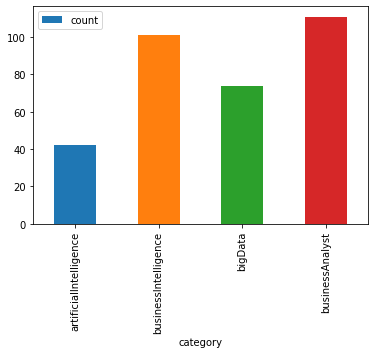

In [119]:
by_category.plot.bar(x="category", y="count")

In [120]:
next(db.jobs.find({}))

{'_id': ObjectId('60017dc755ec55eda0c59766'),
 'id': 'WQ5OKM3N',
 'apply': {'onlineInterviewAvailable': True},
 'specs': {'details': {'custom': [], 'flexibleHours': True},
  'dailyTasks': [],
  'travelling': 'none',
  'workProfile': {'type': 'mainlyFeatures'},
  'referral': {'allowed': True}},
 'title': 'Senior Backend Developer PHP',
 'basics': {'category': 'backend',
  'seniority': ['Senior', 'Expert'],
  'technology': 'php'},
 'company': {'url': 'investcore.pl',
  'logo': 'companies/logos/jobs_details/investcorelogowhite_kwadrat_20201027_102742.png',
  'name': 'Investcore Sp. z o.o. Sp. k.',
  'size': '20+',
  'consentsInfo': {'marketingInfo': False, 'termsAndConditions': True},
  'additionalContactEmails': ['akoszala@investcore.pl']},
 'details': {'quote': '',
  'coverPhoto': '/upload/cover_Warszawa_20200701_134751.jpeg',
  'description': '',
  'quoteAuthor': ''},
 'preview': '',
 'benefits': {'benefits': ['Flat structure', 'Small teams'],
  'equipment': {'computer': 'Workstation',

In [247]:
skills = db.jobs.aggregate([
    {"$match": {
        "basics.category": {
            "$in": [
                'businessAnalyst',
                'businessIntelligence',
                'bigData',
                'artificialIntelligence'
            ]
        }
    }},
    {
        "$project": {
            "must_have": "$requirements.musts",
        }
    },
    {"$unwind": "$must_have"},
    {
        "$project": {
            "skill" : "$must_have.value",
            "type" : "$must_have.type",
        }
    },
    {
        "$group": {
            "_id": {
                "skill": "$skill",
                "type": "$type"
            },
            "count": {"$sum": 1}
        }
    },
    {
        "$project": {
            "_id": 0,
            "skill" : "$_id.skill",
            "type" : "$_id.type",
            "count" : "$count"
        }
    },
    {"$match": {"count": {"$gt": 5}}},
    {"$sort": {"count": -1}},
])

In [248]:
next(skills)

{'skill': 'English', 'type': 'other', 'count': 192}

In [249]:
mhSkills = pd.DataFrame(list(skills))

In [250]:
mhSkills.set_index(['skill'], inplace=True)

In [251]:
all_counted = sum((mhSkills['count']))

In [252]:
mhSkills['percentage_of_all'] = mhSkills['count'].map(lambda x: x/all_counted)

In [283]:
mhSkills[:10]

,count,type,percentage_of_all
skill,,,
SQL,159,main,0.095210
Communication skills,143,other,0.085629
Problem solving,94,other,0.056287
Python,88,main,0.052695
Team player,87,other,0.052096
Proactivity,78,other,0.046707
Business analysis,67,main,0.040120
ETL,62,main,0.037126
Polish,49,other,0.029341


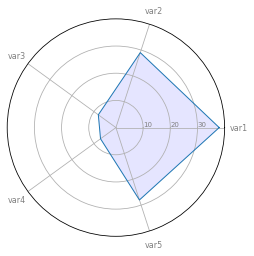

In [254]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['AA'],
'var1': [38],
'var2': [29],
'var3': [8],
'var4': [7],
'var5': [28]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


In [255]:
df

,group,var1,var2,var3,var4,var5
0,AA,38,29,8,7,28


In [275]:
techSkills = mhSkills[mhSkills['type'].str.contains('main')][:15]

In [281]:
df = techSkills[['count']].sort_index().transpose()

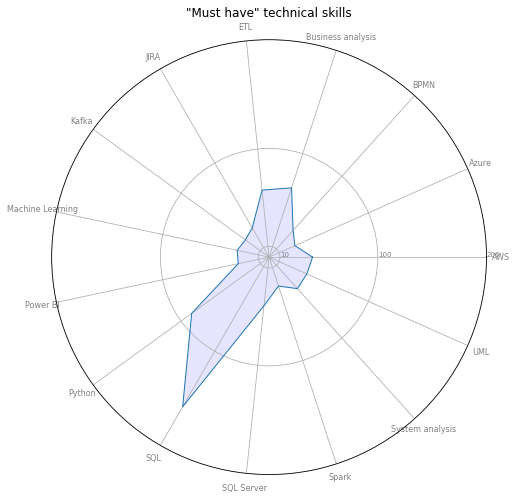

In [282]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
plt.figure(figsize=(8,8))
 
# number of variable
categories=list(df)
N = len(categories)
#display(categories)
#display(N)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.iloc[0].values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
plt.title("\"Must have\" technical skills")

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,100,200], ["10","100","200"], color="grey", size=7)
plt.ylim(0,200)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)